#### seaborn scatter 散点图
- seaborn.relplot(kind='scatter'): figure-level
- seaborn.scatterplot():           axes-level

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.read_csv('./input/athlete_events.csv')
df2 = pd.read_csv('./input/noc_regions.csv')
df = pd.merge(df1, df2, how='left',
              on='NOC', validate='m:1')

In [3]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [5]:
df_hw = df.dropna(
    subset=['Height', 'Weight'],
    how='any'
)
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206853 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      206853 non-null  int64  
 1   Name    206853 non-null  object 
 2   Sex     206853 non-null  object 
 3   Age     206165 non-null  float64
 4   Height  206853 non-null  float64
 5   Weight  206853 non-null  float64
 6   Team    206853 non-null  object 
 7   NOC     206853 non-null  object 
 8   Games   206853 non-null  object 
 9   Year    206853 non-null  int64  
 10  Season  206853 non-null  object 
 11  City    206853 non-null  object 
 12  Sport   206853 non-null  object 
 13  Event   206853 non-null  object 
 14  Medal   30196 non-null   object 
 15  region  206583 non-null  object 
 16  notes   3494 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 28.4+ MB


In [6]:
sns.set(context='talk',
        palette='husl')

In [7]:
df_hw = df_hw[df_hw['NOC'].isin(
    ['CHN', 'USA', 'RUS'])]
df_hw = df_hw[df_hw['Year'] >= 2008]
df_hw.drop_duplicates(subset=['ID'])
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6969 entries, 1 to 270988
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      6969 non-null   int64  
 1   Name    6969 non-null   object 
 2   Sex     6969 non-null   object 
 3   Age     6969 non-null   float64
 4   Height  6969 non-null   float64
 5   Weight  6969 non-null   float64
 6   Team    6969 non-null   object 
 7   NOC     6969 non-null   object 
 8   Games   6969 non-null   object 
 9   Year    6969 non-null   int64  
 10  Season  6969 non-null   object 
 11  City    6969 non-null   object 
 12  Sport   6969 non-null   object 
 13  Event   6969 non-null   object 
 14  Medal   1920 non-null   object 
 15  region  6969 non-null   object 
 16  notes   0 non-null      object 
dtypes: float64(3), int64(2), object(12)
memory usage: 980.0+ KB


<Axes: xlabel='Height', ylabel='Weight'>

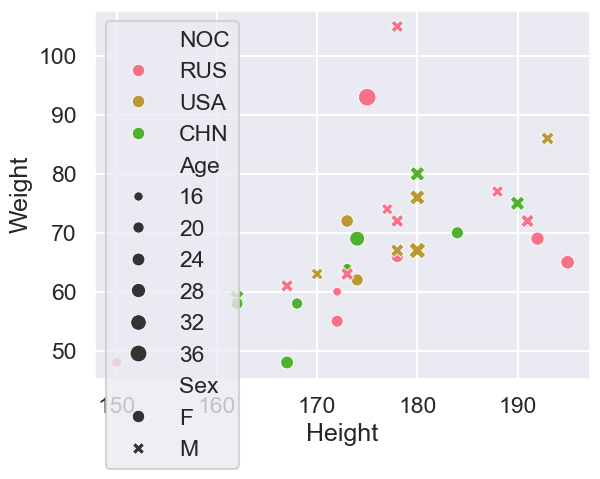

In [8]:
sns.scatterplot(
    x='Height',
    y='Weight',
    data=df_hw.sample(30),
    hue='NOC',
    style='Sex',
    size='Age'
)

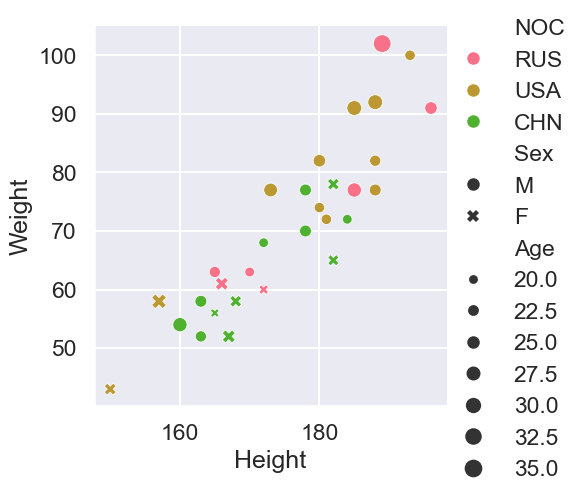

In [9]:
sns.relplot(
    kind='scatter',
    x='Height',
    y='Weight',
    data=df_hw.sample(30),
    hue='NOC',
    style='Sex',
    size='Age'
)

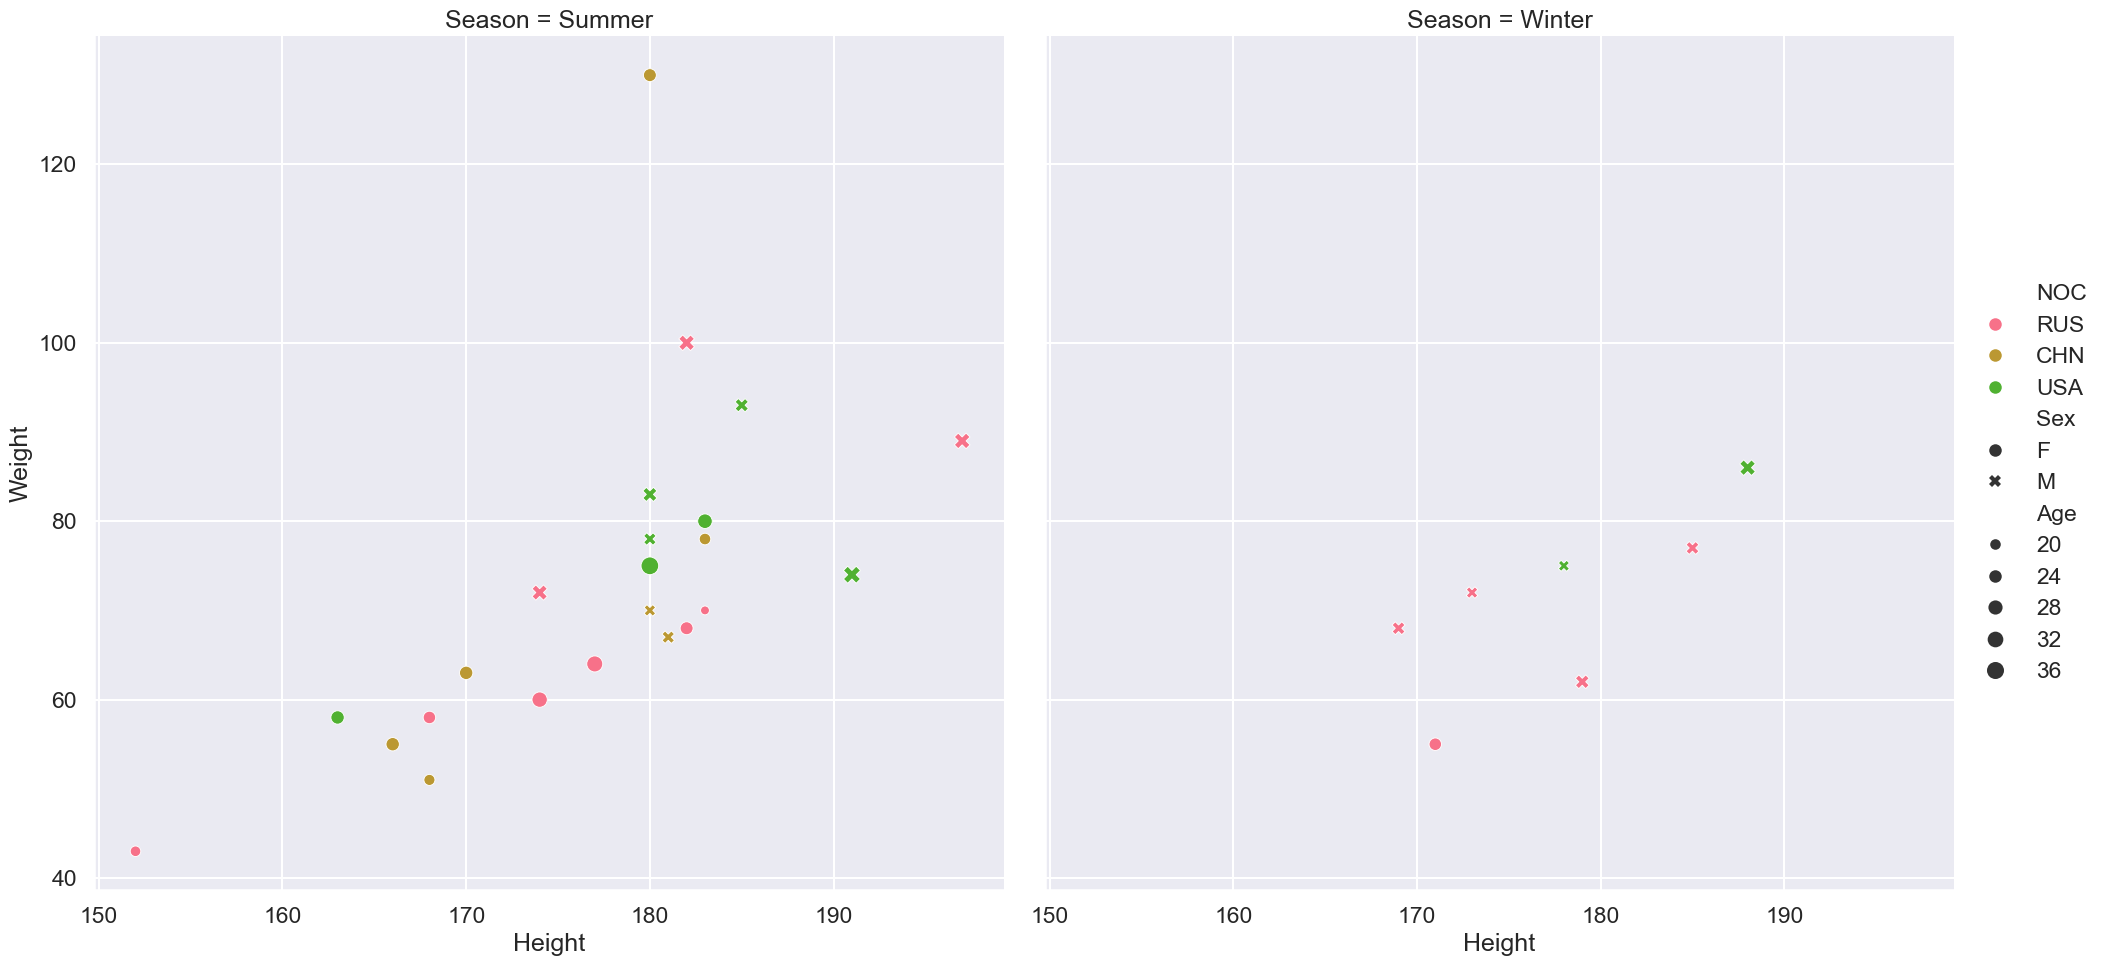

In [10]:
sns.relplot(
    kind='scatter',
    x='Height',
    y='Weight',
    data=df_hw.sample(30),
    hue='NOC',
    style='Sex',
    size='Age',
    col='Season',
    aspect= 1,
    height=10
)

In [11]:
pd.pivot_table


<function pandas.core.reshape.pivot.pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'Hashable' = 'All', observed: 'bool | lib.NoDefault' = <no_default>, sort: 'bool' = True) -> 'DataFrame'>